# New York Airbnb

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

Desde 2008, los huéspedes y anfitriones han utilizado Airbnb para ampliar las posibilidades de viaje y presentar una forma más única y personalizada de experimentar el mundo. Este conjunto de datos describe la actividad de listado y las métricas en NYC, NY para 2019.

In [6]:
df = pd.read_csv("./data/airbnb_NYC_2019.csv", sep=",")
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Este dataset proviene con la siguiente descripción de columnas:
- **`id`**: listing ID
- **`name`**: name of the listing
- **`host_id`**: host ID
- **`host_name`**: name of the host
- **`neighbourhood_group`**: location
- **`neighbourhood`**: area
- **`latitude`**: latitude coordinates
- **`longitude`**: longitude coordinates
- **`room_type`**: listing space type
- **`price`**: price in dollars
- **`minimum_nights`**: amount of nights minimum
- **`number_of_reviews`**: number of reviews
- **`last_review`**: latest review
- **`reviews_per_month`**: number of reviews per month
- **`calculated_host_listings_count`**: amount of listing per host
- **`availability_365`**: number of days when listing is available for booking

Voy a comenzar el análisis familiarizandome con el dataframe y haciendo un estudio superficial: Forma, tipos de datos, nulos, estadisticas principales...

In [7]:
df.shape

(48895, 15)

In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.describe(exclude=[np.number])  

,name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48895,48895,48895,38843
unique,47905,5,221,3,1764
top,Hillside Hotel,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,21661,3920,25409,1413


In [11]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [12]:
for col in df.columns[df.dtypes==object]:
    display((df.groupby([col]).size()/df.shape[0]).reset_index(name='counts'))

,name,counts
0,1 Bed Apt in Utopic Williamsburg,0.00002
1,2-3 bedroom UWS garden triplex,0.00002
2,3 bedroom loft in Williamsburg,0.00002
3,A charming Space in Brooklyn,0.00002
4,AMAZING TIME SQUARE!!BRICK WALLS!!,0.00002
...,...,...
47900,한성 韓城 Han B (2F),0.00002
47901,한성 韓城 Han C (2F),0.00002
47902,️CENTRALLY LOCATED️- Great for Families + Groups,0.00002
47903,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,0.00002


,neighbourhood_group,counts
0,Bronx,0.022313
1,Brooklyn,0.411167
2,Manhattan,0.443011
3,Queens,0.115881
4,Staten Island,0.007629


,neighbourhood,counts
0,Allerton,0.000859
1,Arden Heights,0.000082
2,Arrochar,0.000429
3,Arverne,0.001575
4,Astoria,0.018407
...,...,...
216,Windsor Terrace,0.003211
217,Woodhaven,0.001800
218,Woodlawn,0.000225
219,Woodrow,0.000020


,room_type,counts
0,Entire home/apt,0.519665
1,Private room,0.456611
2,Shared room,0.023724


,last_review,counts
0,2011-03-28,0.000020
1,2011-04-25,0.000020
2,2011-05-12,0.000020
3,2011-09-18,0.000020
4,2011-09-19,0.000020
...,...,...
1759,2019-07-04,0.006749
1760,2019-07-05,0.011862
1761,2019-07-06,0.011555
1762,2019-07-07,0.014685


- Número de atributos en el dataframe: 15
- Número de observaciones (airbnbs) en el dataframe: 48.895

--- o ----

Expongo un resumen de los comentarios encontrados. Algunos de ellos derivan en más comprobaciones en las próximas celdas:

* Name => Título del alojamiento en airbnb. Tiene nulos, pero a priori no sería un problema porque no nos afecta en las métricas y tipo de análisis que vamos a hacer. Hay valores que se repiten, pero como el count del ID nos muestra que todos los identificadores son unicos, no me preocupa.

* neighbourhood_group => Los 5 distritos de NY, no hay valores nulos ni erróneos.

* neighbourhood => Barrios de los diferentes barrios de NY, habría que comprobar que están correctamente asociados a cada distrito y si hay alguno que no exista. Pero de momento no parece nada incorrecto, no hay nulos y son 221 que teniendo en cuenta que Brooklyn tiene 77 no sería raro

* room_type => 3 valores únicos, sin nulos, los más típicos son alojamientos enteros privados o habitaciones privadas

* price => Viene en formato int, y lo único raro observado es que el mínimo es 0 dólares.

* minimum_nights => Sin nulos, pero el valor máximo parece a priori demasiado grande para ser verdad. Más de 2 años de noches mínimas

* last_review: Fechá de la última reseña. Con valores nulos que habría que investigar si son todos por airbnbs sin ninguna reseña todavía

* reviews_per_month => Float, mismo caso que el atributo anterior

* avalilability_365 => Sin nulos, pero hay airbnbs que tienen 0 días disponibles al año, cosa que no tiene sentido a priori.

A continuación, voy a seguir haciendo comprobaciones y modificaciones teniendo en cuenta las observaciones que he realizado en la celda anterior.

1. Lo primero voy a rellenar los campos Name con un string vacío "", para eliminar los nulos de ese atributo

In [13]:
df.loc[df['name'].isnull(), ['name']] = ""
df['name'].isnull().sum()/df.shape[0]

0.0

2. Ahora voy a comprobar la info relativa a los pisos que tienen precio = 0

In [14]:
df.loc[df['price']==0, :].shape

(11, 15)

In [15]:
df.loc[df['price']==0, :]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


Dado que son solo 11 observaciones, voy a eliminar estos pisos para que no influyan en los calculos de precio medio y demás métricas.

In [16]:
df = df.loc[df['price']>0, :]

3. A continuación, voy a investigar que valores tiene la columna minimum_nights, ya que antes, he observado que es más alto de lo que me parecería normal.

In [17]:
df.sort_values(by='minimum_nights', ascending=False)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
2854,1615764,,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
38664,30378211,Shared Studio (females only),200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26286,20957575,Private Room in East Village *FEMALE Guests o...,52768036,Manhattan,East Village,40.72793,-73.98876,Private room,85,1,44,2019-06-13,2.01,1,19
26284,20956802,Private cozy and large room(103),75216989,Queens,Flushing,40.76376,-73.83094,Private room,55,1,40,2019-05-26,1.83,4,342
26283,20955493,Welcoming New York,103477264,Queens,St. Albans,40.70791,-73.75625,Private room,45,1,30,2018-10-20,1.37,1,0
26278,20947437,UES Renovated Safe Location,100685031,Manhattan,Upper East Side,40.76798,-73.95274,Entire home/apt,148,1,68,2019-06-17,3.09,1,98


Dado que veo que hay varios valores que son muy altos, voy a eliminar los que se salgan de un rango normal. Es decir, los outliers

In [18]:
mu = df['minimum_nights'].quantile(0.5)
sig = 0.74*(df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25))

In [19]:
df = df.loc[((mu - 5*sig) < df['minimum_nights']) & ((mu + 5*sig) > df['minimum_nights'])]

In [20]:
df['minimum_nights'].max()

17

In [21]:
df['minimum_nights'].min()

1

4. Ahora me voy a encargar de los valores nulos que tenían los atributos 'last_review' y 'reviews_per_month'. Primero voy a comprobar que todos ellos sean porque no tienen reseñas, luego modificarlos.

In [22]:
df.loc[df['reviews_per_month'].isnull(), :]['number_of_reviews'].max()

0

In [23]:
df.loc[df['last_review'].isnull(), :]['number_of_reviews'].max()

0

In [24]:
df.loc[df['reviews_per_month'].isnull(), ['reviews_per_month']] = 0.0

Realmente, la columna fecha 'last_review' no debería tener valores cuando el alojamiento no tiene reseñas. Como es de tipo objeto, voy a sustituirlo por una cadena de caracteres vacía.

In [25]:
df.loc[df['last_review'].isnull(), ['last_review']] = ""

5. Por último, voy a investigar el atributo 'availability_365' que tenía pisos que no estaban disponibles ningún día.

In [26]:
df.loc[df['availability_365']==0, :].shape

(16796, 15)

Puesto que son muchos pisos los que no tienen ningún día disponible, puede ser que sea porque ya estén reservados, por tanto, no voy a realizar ninguna modificación para esta columna

In [27]:
df.shape

(43297, 15)

A continuación, voy a realizar varias consultas para conocer en profundidad el estado de los airbnbs en NY. Empiezo comparando el precio máximo, medio y mínimo según el neighbourhood y neighbourhood_group.

In [28]:
df.pivot_table('price', index=['neighbourhood_group','neighbourhood'], aggfunc='min')

price
neighbourhood_group neighbourhood       
Bronx               Allerton          33
                    Baychester        53
                    Belmont           24
                    Bronxdale         25
                    Castle Hill       38
...                                  ...
Staten Island       Tottenville       70
                    West Brighton     37
                    Westerleigh       40
                    Willowbrook      249
                    Woodrow          700

[221 rows x 1 columns]

In [29]:
df.pivot_table('price', index=['neighbourhood_group','neighbourhood'], aggfunc='max')

price
neighbourhood_group neighbourhood       
Bronx               Allerton         450
                    Baychester       101
                    Belmont          299
                    Bronxdale        100
                    Castle Hill      128
...                                  ...
Staten Island       Tottenville      299
                    West Brighton    200
                    Westerleigh      103
                    Willowbrook      249
                    Woodrow          700

[221 rows x 1 columns]

In [30]:
df.pivot_table('price',index=['neighbourhood_group','neighbourhood'], aggfunc='mean')

price
neighbourhood_group neighbourhood            
Bronx               Allerton        87.595238
                    Baychester      75.428571
                    Belmont         79.304348
                    Bronxdale       57.105263
                    Castle Hill     63.000000
...                                       ...
Staten Island       Tottenville    144.857143
                    West Brighton   85.625000
                    Westerleigh     71.500000
                    Willowbrook    249.000000
                    Woodrow        700.000000

[221 rows x 1 columns]

Dado que hay un gran número de barrios, no se pueden sacar demasiadas conclusiones de estas agrupaciones, más adelante voy a comporar el precio según los distritos, que siendo solo 5 y en modo gráfica se observará mejor.

Ahora, voy a realizar un ranking con el top 10 anfitriones más populares de Airbnb.

In [31]:
df.groupby(['host_id']).size().sort_values(ascending=False)[0:10]

host_id
219517861    190
190921808     40
119669058     34
213781715     33
224414117     30
417504        28
205031545     25
39528519      24
252604696     20
134184451     18
dtype: int64

Lo he realizado mediante el host_id, ya que el dataframe no tiene el nombre de los host. En el ranking se puede observar que hay un host que sobresale por encima del resto, sacando 150 alojamientos de diferencia al segundo. Podría ser una empresa o cadena, dudo que en este caso una sola persona pueda manejar semejante cantidad de pisos.

Ahora voy a realizar un ranking con el top 10 neighbourhood con más anuncios. Construye el ranking para poder ver también el neighbourhood_group al que pertenece cada uno.

In [32]:
df.groupby(['neighbourhood_group', 'neighbourhood']).size().sort_values(ascending=False)[0:10]

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3627
                     Bedford-Stuyvesant    3396
Manhattan            Harlem                2428
Brooklyn             Bushwick              2240
Manhattan            East Village          1682
                     Hell's Kitchen        1615
                     Upper West Side       1572
Brooklyn             Crown Heights         1456
Manhattan            Upper East Side       1429
                     Midtown               1151
dtype: int64

Este ranking nos ayuda a hacernos una idea de cuáles son los barrios más turísticos y por tanto, con más alojamientos disponibles, en este caso Manhattan y Brooklyn salen reforzados de esta métrica.

A continuación, voy a analizar la media de noches mínimas que las personas se quedan según el tipo de habitación

In [33]:
df.pivot_table('minimum_nights', columns='room_type', aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
minimum_nights,3.221409,2.743164,2.37799


Antes, en el análisis previo, se ha observado como el tipo "shared room" era con diferencia el menos disponible por número de anuncios, tanto es así, que para este tipo de métricas se necesitarían más datos para afirmar ciertos hechos, pero a priori, tiene sentido que el tipo de alojamiento menos "cómodo" sea el que menos noches mínimas tenga de media.

Ahora voy a dibujar las distribuciones de cada variable.

<AxesSubplot: >

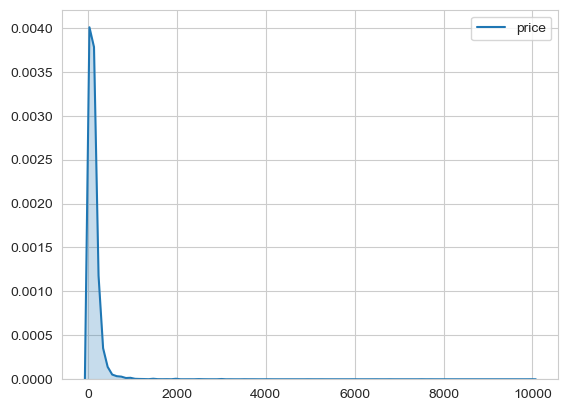

In [34]:
sns.kdeplot(df['price'], shade=True)

<AxesSubplot: >

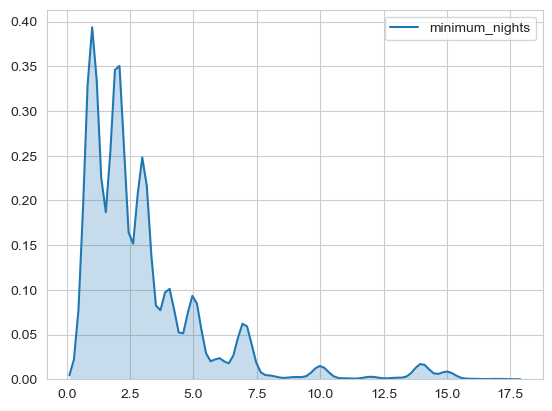

In [35]:
sns.kdeplot(df['minimum_nights'], shade=True)

<AxesSubplot: >

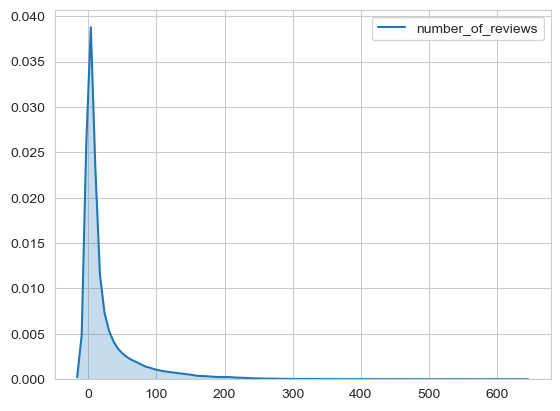

In [36]:
sns.kdeplot(df['number_of_reviews'], shade=True)

<AxesSubplot: >

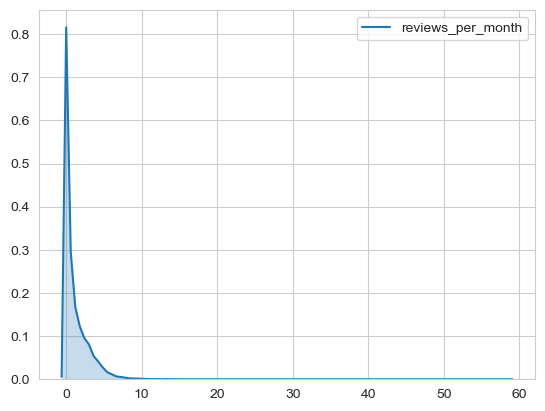

In [37]:
sns.kdeplot(df['reviews_per_month'], shade=True)

<AxesSubplot: >

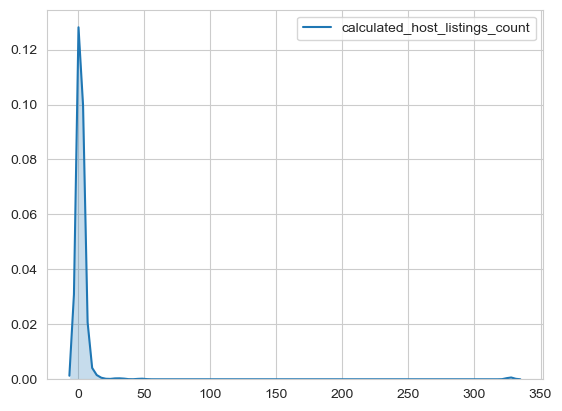

In [38]:
sns.kdeplot(df['calculated_host_listings_count'], shade=True)

<AxesSubplot: >

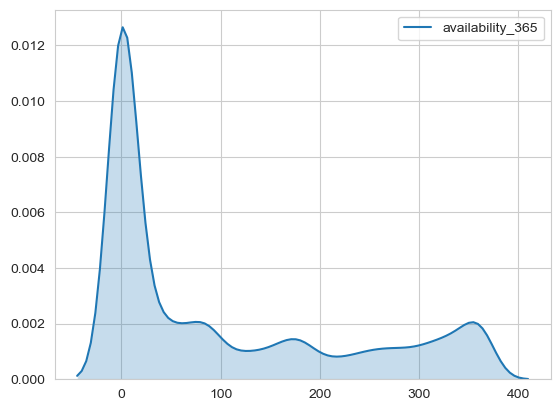

In [39]:
sns.kdeplot(df['availability_365'], shade=True)

Como se observa en las gráficas ninguna variable tiene una distribución normal. Se observa que en los airbnb predominan los alojamientos con noches mínimas bajas.

Ahora voy a dibujar gráficas de dispersión entre parejas de variables: (price, number_of_reviews) y (price, availability_365)

<AxesSubplot: xlabel='number_of_reviews', ylabel='price'>

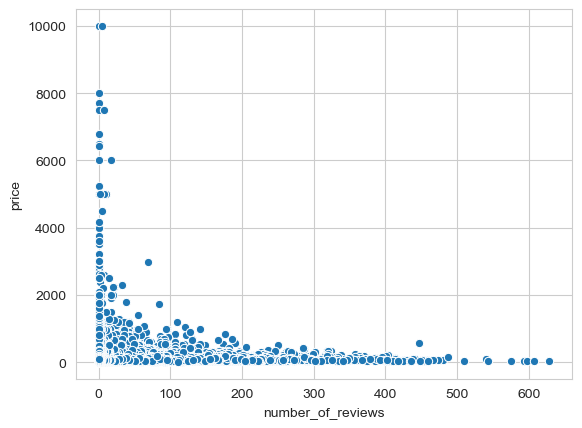

In [40]:
sns.scatterplot(data = df, x='number_of_reviews', y='price')

Se puede ver como los alojamientos con un precio bajo tienden a tener más reviews, esto puede deberse a que son "económicamente" viables para mayor número de personas, por tanto, tienen más probalidad de tener más reseñas y opiniones. Habría que estudiar también, la correlacción de número de reseñas dejadas por las personas según su tipo de renta, así podríamos saber si las personas de mayor renta económica son menos dados a dejar reseñas y así reforzar la afirmación anterior.

<AxesSubplot: xlabel='availability_365', ylabel='price'>

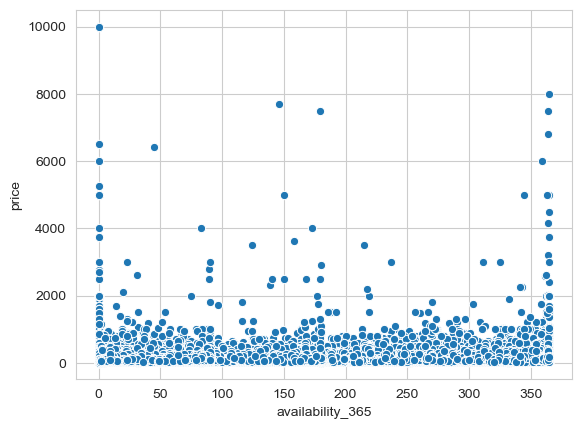

In [41]:
sns.scatterplot(data = df, x='availability_365', y='price')

No se observa correctamente la dispersión dado la cantidad de puntos en el gráfico, así que de momento no saco ninguna conclusión de la relación entre las dos variables

A continuación, voy a dibujar un gráfico de barras la cantidad de anuncios según el distrito al que pertenece. Y posteriormente, un gráfico que relacione el precio con el distrito

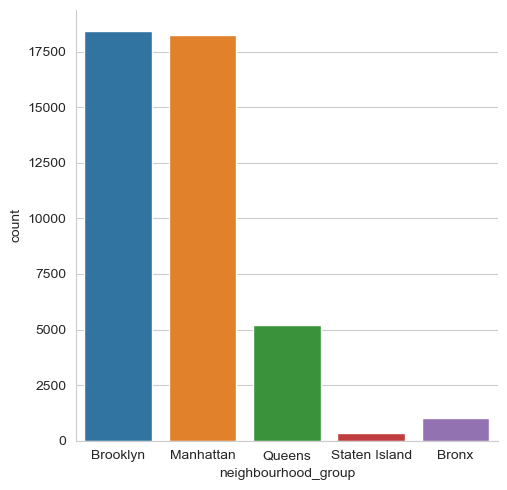

In [42]:
sns.catplot(data = df, x='neighbourhood_group', kind="count")

Para reafirmar los hechos en una de las pivot tables anteriores, esta gráfica nos ayuda a hacernos una idea de cuáles son los barrios más turísticos y como se ve, Brooklyn y Manhattan salen reforzados.

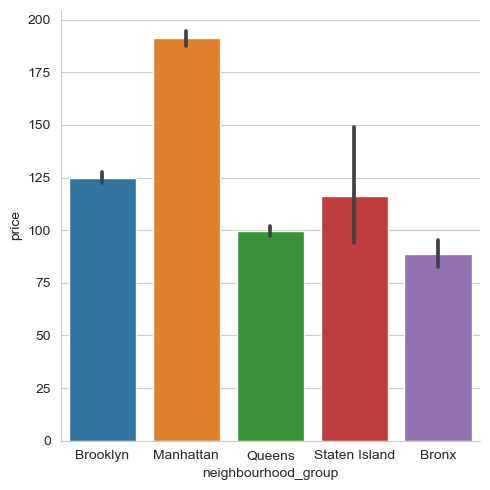

In [43]:
sns.catplot(data = df, x='neighbourhood_group', y='price', kind="bar")

En relación con la gráfica anterior,  se puede observar como fluctúa el precio en los diferentes distritos. Observamos como Staten Island es el tercer distrito con mayores precios de media, esto podría estar relacionado con la poca oferta de alojamientos que se ha observado en la gráfica anterior. Más conclusiones que se podrían sacar, sería el bajo precio del Bronx, seguramente relacionado con la mala fama de este distrito.

Voy a Continuar observando la correlación entre las diferentes variables.

In [44]:
columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
           'calculated_host_listings_count', 'availability_365']

<AxesSubplot: >

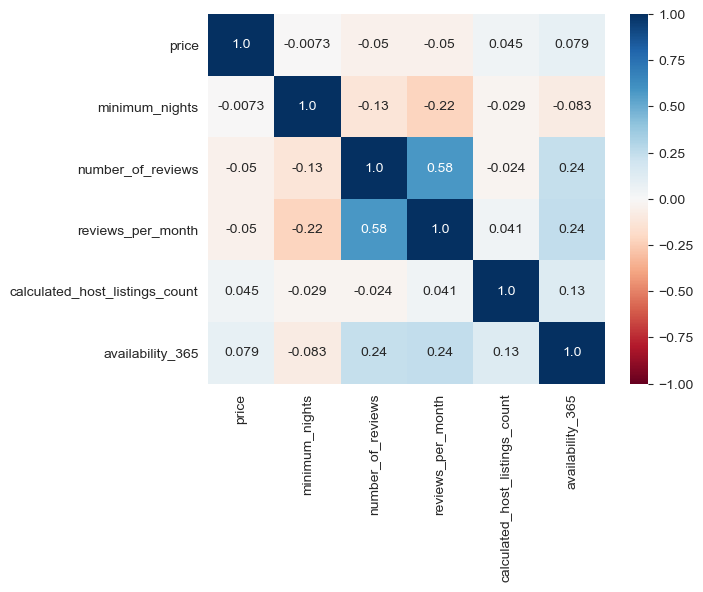

In [45]:
sns.heatmap(df[columns].corr(), annot=True, fmt=".2", vmin=-1, vmax=1, cmap='RdBu')

Se observa alta correlación entre las variables 'number_of_reviews' y 'reviews_per_month', dado que la segunda depende directamente de la primera, no nos aporta nueva información.

A continuación, voy a realizar un gráfico que relacione el tipo de habitación con el precio del alojamiento. A priori, tendría sentido que el precio más alto corresponda con el del alojamiento privado.

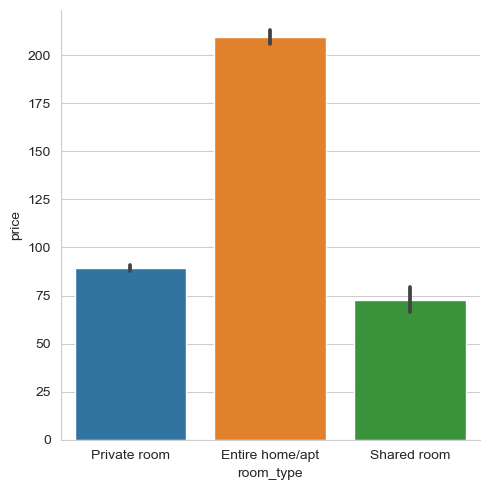

In [46]:
sns.catplot(data = df, x='room_type', y='price', kind="bar")

Como era previsible, gran diferencia de precios del alojamiento entero privado con los otros dos tipos.

Por último, voy a realizar una gráfica con una serie temporal de las últimas reseñas.

Para este último grafíco voy a realizar un análisis previo de las fechas que comprenden las reseñas, y saber que dimensiones y rangos debe tener la serie.

In [47]:
df.loc[df['last_review'] != "", ['last_review']].sort_values(by="last_review")

,last_review
317,2011-03-28
163,2011-04-25
330,2011-05-12
125,2011-09-18
143,2011-09-19
...,...
21609,2019-07-08
41194,2019-07-08
41072,2019-07-08
42665,2019-07-08


Al ser reseñas que van desde 2011 hasta 2019, voy a añadir una columna al dataframe, extrayendo el año y a partir de ese nuevo atributo pintaré la gráfica.

In [48]:
df['year'] = pd.DatetimeIndex(df['last_review']).year

In [49]:
date = df[df['last_review'] != ""].groupby('year').size()

<AxesSubplot: xlabel='year'>

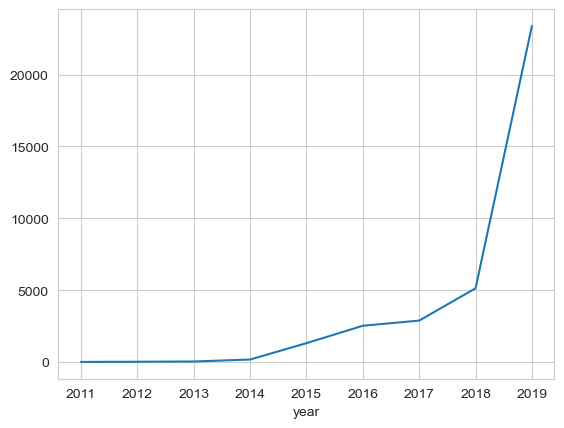

In [50]:
sns.lineplot(x=date.index, y=date.values)

Al ser fechas de las últimas reseñas es comprensible que la mayor parte sea del último año que se tiene constancia. Pero está gráfica nos da información valiosa, ya que habría muchos pisos que no obtienen una valoración por parte de sus clientes desde hace años. Habría que estudiar más a fondo el porque.